***********
## Question 1 (10 points): 

Now that we have gone through some examples in the lecture and lab we are ready to apply some of these methods ourselves. Start by making a **new** `jupyter notebook` called `lab4_submission.ipynb` and complete the following tasks. 

Find the following numbers in the climate reanalysis dataset:

* a) the air temperature (in F) **and** cloud cover (in %) in Florence, OR (in 2020) on **January 31, 2020**?
* b) the air temperature (in F) **and** cloud cover (in %) in **Eugene, OR** (in 2020) on **February 15, 2020**?

You can use the following table to convert from a **date** to a **day-of-year**: https://landweb.modaps.eosdis.nasa.gov/browse/calendar.html


*******
## Question 2 (20 points):

Find the following grid cells in the climate reanalysis dataset and provide a rough location of where they are located. 

* a) Highest average air temperature (i.e. hottest place)
* b) Lowest average air temperature (i.e. coldest place)
* c) Highest average cloudiness (i.e. cloudiest place)
* d) Lowest average cloudiest (i.e. least cloudy place)
* e) Place with highest range in air temperature
* f) Place with the absolute coldest temperature on a single day 

You can use the following link to convert your lat/lons to an address: https://www.latlong.net/Show-Latitude-Longitude.html

**********

## Question 3 (20 points): 

Display the Landsat image of Florence, OR as:

* a) an **NDVI** image (i.e. (Band 5 - Band 4) / (Band 5 + Band 4))
* b) a **color infrared composite** (i.e. bands 5, 4, 3)

*********

## Question 4 (for grad students/extra credit)

* a) Produce an NDWI histogram for the Landsat image of Florence 
* b) Choose a threshold and produce a binary water mask
* c) Compute the area of water in the image (including ocean)


## Remember to submit your answers to Questions 1, 2 and 3 **by Friday 11:59pm**

In [1]:
# Import packages
import os
import glob

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import rasterio
import xarray

In [2]:
# Define filepath
filepath = '/Users/isaiastorres/Desktop/GEOG490/geospatial-data-science/labs/lab4/'

# Define list of Landsat bands
files = sorted(glob.glob(filepath + 'landsat/*.tif'))
print(files)

['/Users/isaiastorres/Desktop/GEOG490/geospatial-data-science/labs/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B1.tif', '/Users/isaiastorres/Desktop/GEOG490/geospatial-data-science/labs/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B2.tif', '/Users/isaiastorres/Desktop/GEOG490/geospatial-data-science/labs/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B3.tif', '/Users/isaiastorres/Desktop/GEOG490/geospatial-data-science/labs/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B4.tif', '/Users/isaiastorres/Desktop/GEOG490/geospatial-data-science/labs/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B5.tif', '/Users/isaiastorres/Desktop/GEOG490/geospatial-data-science/labs/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B6.tif', '/Users/isaiastorres/Desktop/GEOG490/geospatial-data-science/labs/lab4/landsat/LC08_L2SP_047029_20200814_20210330_02_T1_SR_B7.tif', '/Users/isaiastorres/Desktop/GEOG490/geospatial-data-science/labs/lab4/land

In [5]:
xds = xarray.open_dataset(filepath + 'era/usa_t2m_tcc_2020.nc', decode_coords='all')
xds_daily = xds.resample(time='1D').mean()
xds_daily

<xarray.Dataset>
Dimensions:    (time: 366, longitude: 233, latitude: 99)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
  * latitude   (latitude) float32 49.24 48.99 48.74 48.49 ... 25.24 24.99 24.74
Data variables:
    t2m        (time, latitude, longitude) float32 280.6 281.4 ... 296.3 296.2
    tcc        (time, latitude, longitude) float32 0.9765 0.8814 ... 0.2124

In [6]:
xds_daily = xds.resample(time='1D').mean()
xds_daily

<xarray.Dataset>
Dimensions:    (time: 366, longitude: 233, latitude: 99)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
  * latitude   (latitude) float32 49.24 48.99 48.74 48.49 ... 25.24 24.99 24.74
Data variables:
    t2m        (time, latitude, longitude) float32 280.6 281.4 ... 296.3 296.2
    tcc        (time, latitude, longitude) float32 0.9765 0.8814 ... 0.2124

In [8]:
# Next, find the index of the grid point nearest a specific lat/lon.   
florence_weather = xds_daily.sel(latitude=43.974659, longitude=-124.103142, method='nearest')

/Users/isaiastorres/opt/anaconda3/envs/lab4/lib/python3.8/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/isaiastorres/opt/anaconda3/envs/lab4/lib/python3.8/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


In [28]:
# Note: Jan 31 is DOY 31
print('Cloud cover in Florence on Jan 31, 2020 = %.2f %%' % (florence_weather['tcc'][30].values * 100))

Cloud cover in Florence on Jan 31, 2020 = 93.71 %


In [29]:
f_fahrenheit = (florence_weather['t2m'][30].values - 273.15) * 9/5 + 32
print('Air temperature in Florence on Jan 31, 2020 = %.2f F' % (fahrenheit))

Air temperature in Florence on Jan 31, 2020 = 54.04 F


In [14]:
eugene_weather = xds_daily.sel(latitude=44.0521, longitude=-123.0868, method='nearest')

/Users/isaiastorres/opt/anaconda3/envs/lab4/lib/python3.8/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/isaiastorres/opt/anaconda3/envs/lab4/lib/python3.8/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


In [15]:
# Note: Feb 15 is DOY 46
print('Cloud cover in Eugene on Feb 15, 2020 = %.2f %%' % (eugene_weather['tcc'][45].values * 100))

Cloud cover in Eugene on Feb 15, 2020 = 97.51 %


In [30]:
e_fahrenheit = (eugene_weather['t2m'][45].values - 273.15) * 9/5 + 32
print('Air temperature in Eugene on Feb 15, 2020 = %.2f F' % (fahrenheit))

Air temperature in Eugene on Feb 15, 2020 = 54.04 F


In [69]:
average = (xds_daily['t2m'].mean(dim='time')-273.15)*(9/5)+32 
average_max = average.argmax()
index_max = np.unravel_index(average_max, np.mean(xds_daily['t2m'], axis=0).shape)
print(average_max)

<xarray.DataArray 't2m' ()>
array(18928)


In [31]:
# Open all bands in a loop
list_bands = []
for file in files:
    # Read band
    src = rasterio.open(file)
    band = src.read(1)
    
    # Append to list
    list_bands.append(band)

# Convert from list of arrays to n-dimensional array
all_bands = np.dstack(list_bands)

In [68]:
print(index_max)
average[81,55]

(81, 55)


<xarray.DataArray 't2m' ()>
array(79.06801, dtype=float32)
Coordinates:
    longitude  float32 -111.2
    latitude   float32 28.99

The place with the highest average air temperature is Plan de Ayala Hermosillo México

In [72]:
average_min = average.argmin()
index_min = np.unravel_index(average_min, np.mean(xds_daily['t2m'], axis=0).shape)
print(average_min)

<xarray.DataArray 't2m' ()>
array(4954)


In [74]:
print(index_min)
average[21,61]

(21, 61)


<xarray.DataArray 't2m' ()>
array(29.179205, dtype=float32)
Coordinates:
    longitude  float32 -109.8
    latitude   float32 43.99

The place with the lowest average air temperature is Cody, Wyoming.

In [75]:
c_mean = xds_daily['tcc'].mean(dim='time') 
c_mean_max = c_mean.argmax()
print(c_mean_max)


<xarray.DataArray 'tcc' ()>
array(0)


In [76]:
index_cloud_max = np.unravel_index(c_mean_max, np.mean(xds_daily['tcc'], axis=0).shape)
print(index_cloud_max)

(0, 0)


In [77]:
c_mean[0,0]

<xarray.DataArray 'tcc' ()>
array(0.77146894, dtype=float32)
Coordinates:
    longitude  float32 -125.0
    latitude   float32 49.24

The place with the highest average cloud cover is Port Alberni, British Columbia, Canada

In [78]:
c_mean_min = c_mean.argmin()
print(c_mean_min)

<xarray.DataArray 'tcc' ()>
array(16584)


In [79]:
index_cloud_min = np.unravel_index(c_mean_min, np.mean(xds_daily['tcc'], axis=0).shape)
print(index_cloud_min)

(71, 41)


In [80]:
c_mean[71,41]

<xarray.DataArray 'tcc' ()>
array(0.16893195, dtype=float32)
Coordinates:
    longitude  float32 -114.8
    latitude   float32 31.49

The place with the lowest average cloud cover is was in the Gulf of Mexico.

In [83]:
daily_high = np.max(xds_daily['t2m'],axis=0) 
daily_low = np.min(xds_daily['t2m'],axis=0) 
t_range = (daily_high - daily_low) 
t_range
h_range = t_range.argmax() 
h_range
h_range_index = np.unravel_index(h_range,xds_daily['t2m'].shape) 
print(h_range_index)

(0, 1, 210)


In [85]:
average[1,210]

<xarray.DataArray 't2m' ()>
array(38.04693, dtype=float32)
Coordinates:
    longitude  float32 -72.5
    latitude   float32 48.99

The place with the highest range in air temperature was Girardville, Quebec, Canada

In [86]:
min = (xds_daily['t2m'].min(dim='time')-273.15)*(9/5)+32
mean_min = min.argmin()
print(mean_min)

<xarray.DataArray 't2m' ()>
array(521)


In [91]:
min_idx = np.unravel_index(mean_min,xds_daily['t2m'].shape) 
min_idx

(0, 2, 55)

In [92]:
min[2,55]

<xarray.DataArray 't2m' ()>
array(-24.57228, dtype=float32)
Coordinates:
    longitude  float32 -111.2
    latitude   float32 48.74

The place with the absolute coldest temperature on a single day was Galata, Montana.

In [32]:
# Convert values to a range of 0-255
all_bands_image = np.uint8((all_bands / 65536) * 255)

In [36]:
# Compute NDVI
np.seterr(divide='ignore', invalid='ignore')
ndvi = np.divide((all_bands[:,:,4].astype(float) - all_bands[:,:,3].astype(float)), \
                 (all_bands[:,:,4].astype(float) + all_bands[:,:,3].astype(float)))

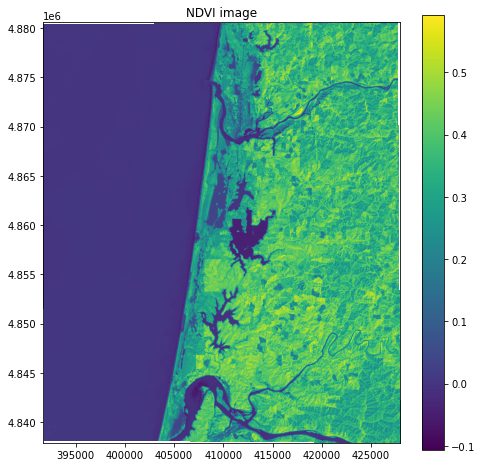

In [39]:
# Plot NDVI image
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndvi, extent=full_extent)
ax.set_title("NDVI image")
fig.colorbar(im, orientation='vertical')
plt.show()

In [40]:
# Write an array as a raster band to a new 8-bit file. For the new file's profile, 
# we start with the profile of the source
profile = src.profile

# And then change the band count to 3, set the dtype to uint8, and specify LZW compression.
profile.update(dtype=rasterio.uint8, count=3, compress='lzw')

In [56]:
infared = np.dstack((all_bands_image[:,:,4],all_bands_image[:,:,3],all_bands_image[:,:,2]))


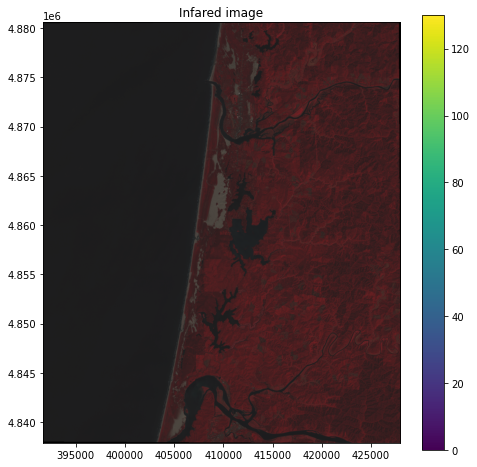

In [57]:
# Plot infared image


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(infared, extent=full_extent)
ax.set_title("Infared image")
fig.colorbar(im, orientation='vertical')
plt.show()